# WE05-CNN - CNN Classification - Keras - Working with image files

### We will predict the category of clothing.

### Import the necessary libraries

In [1]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import datasets
import tensorflow as tf

np.random.seed(86089106)  # for reproducibility

2023-06-18 20:24:19.740998: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Loading the data into train and test sets

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

### Preprocess the data

The data must be preprocessed before training the network. If we inspect the first image in the training set, we will see that the pixel values fall in the range of 0 to 255:

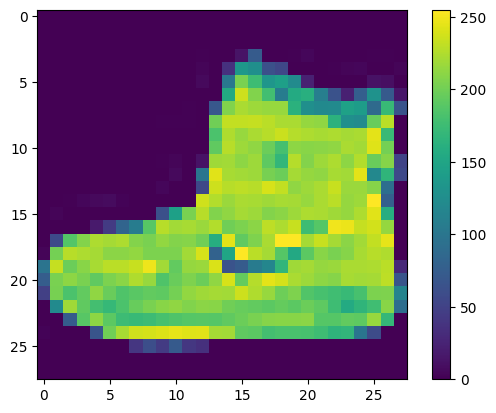

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that we're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

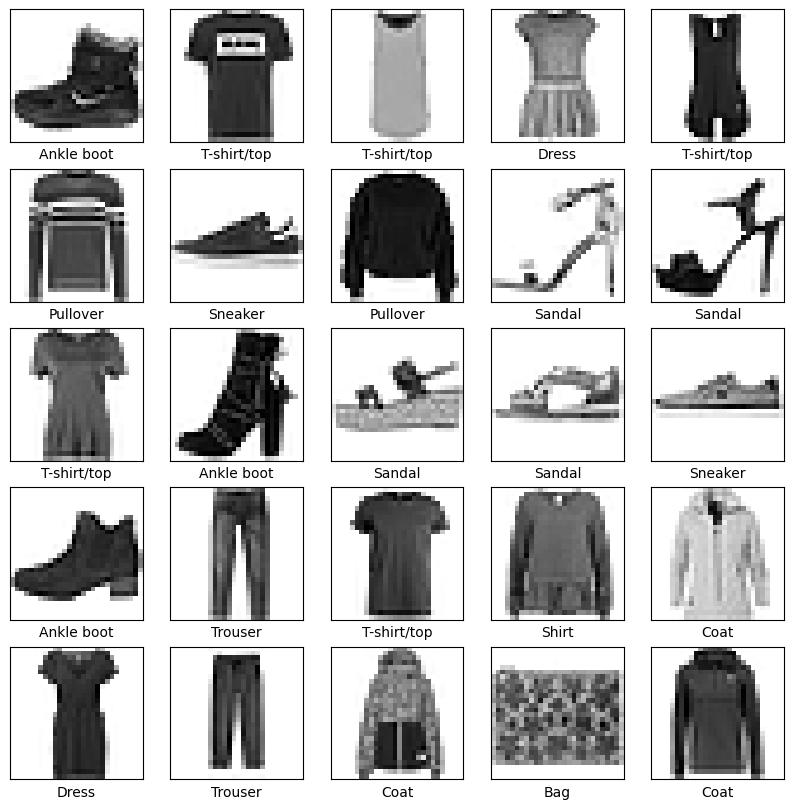

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Developing a CNN model (with pooling) to predict the class of the image (one of 10 classes). 

In [12]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))

2023-06-18 20:24:22.736624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [14]:
#train the model
history = model.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels))

Epoch 1/40
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4284 - accuracy: 0.8453 - val_loss: 0.3362 - val_accuracy: 0.8806
Epoch 2/40
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2887 - accuracy: 0.8936 - val_loss: 0.2783 - val_accuracy: 0.8990
Epoch 3/40
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2421 - accuracy: 0.9110 - val_loss: 0.2625 - val_accuracy: 0.9036
Epoch 4/40
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2116 - accuracy: 0.9203 - val_loss: 0.2620 - val_accuracy: 0.9058
Epoch 5/40
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1835 - accuracy: 0.9318 - val_loss: 0.2441 - val_accuracy: 0.9124
Epoch 6/40
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1598 - accuracy: 0.9405 - val_loss: 0.2651 - val_accuracy: 0.9112
Epoch 7/40
1875/1875 [==============================] - 20s 10ms/step - loss: 0.1367 - accuracy: 0.9487 - val_loss: 0.2577 -

### Summarize the model and its performance

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

### Evaluate accuracy

In [16]:
#Next, compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.8333 - accuracy: 0.9115 - 1s/epoch - 4ms/step

Test accuracy: 0.9114999771118164


### Evaluation of model's performance through accuracy and loss plots 

In [17]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


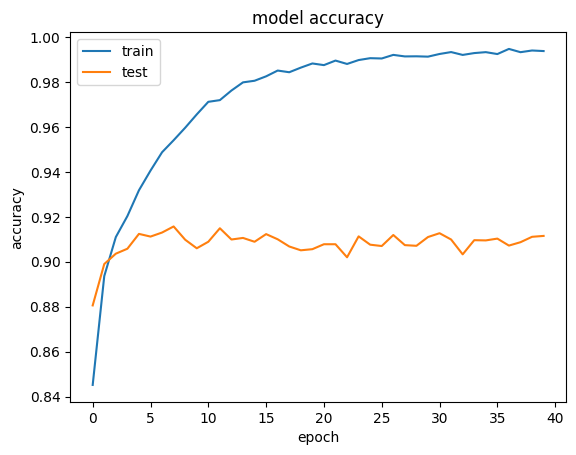

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

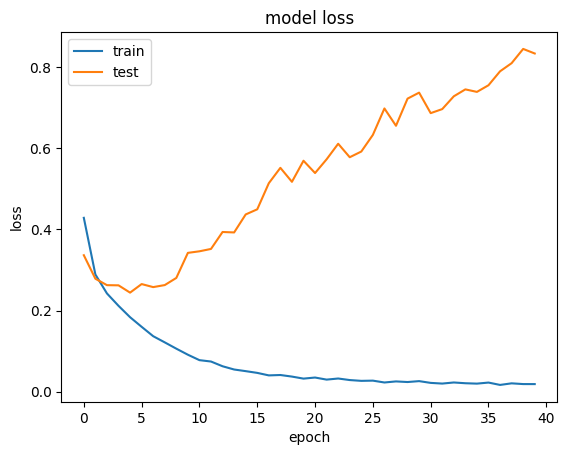

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Make Predictions

In [20]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confution Matrix and Classification Report
#Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict(test_images)
y_pred = np.argmax(Y_pred, axis=1)

# y_test is the actual labels
y_test = test_labels

313/313 [==============================] - 1s 3ms/step


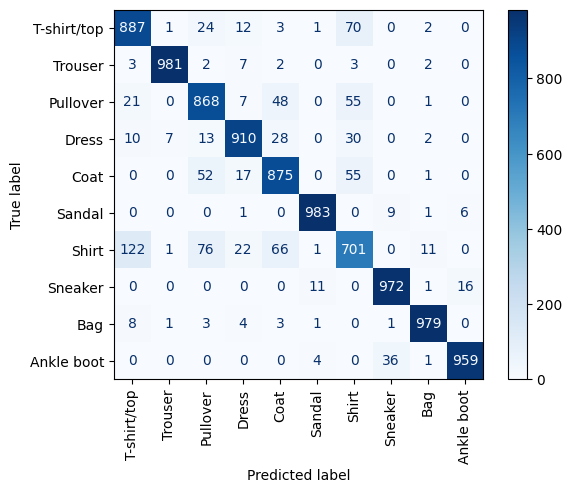

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

# display the confusion matrix
#y_test = validation_generator.classes
#y_pred = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

 T-shirt/top     0.8440    0.8870    0.8649      1000
     Trouser     0.9899    0.9810    0.9854      1000
    Pullover     0.8362    0.8680    0.8518      1000
       Dress     0.9286    0.9100    0.9192      1000
        Coat     0.8537    0.8750    0.8642      1000
      Sandal     0.9820    0.9830    0.9825      1000
       Shirt     0.7670    0.7010    0.7325      1000
     Sneaker     0.9548    0.9720    0.9633      1000
         Bag     0.9780    0.9790    0.9785      1000
  Ankle boot     0.9776    0.9590    0.9682      1000

    accuracy                         0.9115     10000
   macro avg     0.9112    0.9115    0.9111     10000
weighted avg     0.9112    0.9115    0.9111     10000



### Conclusion

I have normalized the pixel values of the training and test images by dividing with 255. This could improve the convergence and stability of the learning algorithm during training. This also helps to ensure pixel values are on a similar scale.

The model consists of a 2D convolutional layer with 64 filters and each filter with a 3*3 kernel size. The input shape for this layer is (28, 28, 1), where the the input images are of 28x28 pixels with a single channel (grayscale). I added a max pooling layer to the model to reduce the spatial dimensions of the input by taking the maximum value within each pool((2,2) in this case). Similarly I added another 2D convolutional layer and max pooling layer. This reduces the computational complexity and extracts the most important features. The 2D output from these layers is flattened into a 1D array. This is followed by a dense hidden layer with 128 neurons using the ReLU activation function. Finally is a dense layer with 10 neurons corresponding to the 10 classes(clothing categories). The activation function used is softmax(multiclass).

I used "SparseCategoricalCrossentropy" loss which is suitable for multi-class classification tasks where the target values are integers(Clothing class represented by each integer).

The model is trained in the span of 40 epochs.

From the classification report and confusion matrix, the performance with respect to each clothing category can be analyzed.

1. Accuracy: The overall accuracy of the model is 91.15%, indicating that it correctly classified 91.15% of the samples in the test set.

2. Precision: Precision measures the accuracy of positive predictions. The highest precision is achieved for the Trouser class with 98.99%, followed by Bag (97.80%), Ankle boot (97.76%), and Sandal (98.20%). Lower precision values are observed for Shirt (76.70%), Pullover (83.62%), and Coat (85.37%).

3. Recall: Recall measures the coverage of positive instances by the model. The highest recall is achieved for Sneaker (97.20%), followed by Trouser (98.10%), Sandal (98.30%), and Bag (97.90%). Lower recall values are observed for Shirt (70.10%), Pullover (86.80%), and Dress (91.00%).

4. F1-score: F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance. The highest F1-scores are achieved for Trouser (98.54%), Sandal (98.25%), Sneaker (96.33%), and Bag (97.85%). Lower F1-scores are observed for Shirt (73.25%), Pullover (85.18%), and Coat (86.42%).

Overall, the model performs well with an accuracy of 91.15%, indicating its ability to classify the majority of the samples correctly. The highest performing classes in terms of precision, recall, and F1-score are Trouser, Sandal, Sneaker, and Bag. These classes show high precision, recall, and F1-scores, indicating accurate and consistent predictions. On the other hand, classes such as Shirt, Pullover, and Coat exhibit relatively lower precision, recall, and F1-scores, suggesting room for improvement in the model's performance for these categories.
